In [1]:
# for presentation purposes
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

# visualize 
import matplotlib.pyplot as plt
from matplotlib.ticker import StrMethodFormatter
from matplotlib.dates import DateFormatter
import seaborn as sns


# working with dates
from datetime import datetime

# to evaluated performance using rmse
from sklearn.metrics import mean_squared_error
from math import sqrt 

# for tsa 
import statsmodels.api as sm

# holt's linear trend model. 
from statsmodels.tsa.api import Holt
import acquire
import prepare

# Model Exercises

## saas.csv

### 1. Split data (train/test) and resample by any period, except daily, and aggregate using the sum.

### 2. Forecast, plot and evaluate using each at least 4 of the methods we discussed:
* Last Observed Value
* Simple Average
* Moving Average
* Holt's Linear Trend
* Holt's Seasonal Trend
* Based on previous year/month/etc., this is up to you.

In [18]:
url = 'https://ds.codeup.com/saas.csv'
df = pd.read_csv(url)
print('shape:', df.shape)
df.head()

shape: (790458, 5)


,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [19]:
df.head()

,Month_Invoiced,Customer_Id,Invoice_Id,Subscription_Type,Amount
0,2014-01-31,1000000,5000000,0.0,0.0
1,2014-01-31,1000001,5000001,2.0,10.0
2,2014-01-31,1000002,5000002,0.0,0.0
3,2014-01-31,1000003,5000003,0.0,0.0
4,2014-01-31,1000004,5000004,1.0,5.0


In [20]:
df.shape

(790458, 5)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 790458 entries, 0 to 790457
Data columns (total 5 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   month_invoiced     790458 non-null  datetime64[ns]
 1   customer_id        790458 non-null  int64         
 2   invoice_id         790458 non-null  int64         
 3   subscription_type  790458 non-null  float64       
 4   amount             790458 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(3)
memory usage: 30.2 MB


In [28]:
# Lowercase column names
df.columns = [col.lower() for col in df]
# Properly parse the datetime field
df.month_invoiced = pd.to_datetime(df.month_invoiced)

In [35]:
df.amount = df.amount.astype(int)
df.subscription_type = df.subscription_type.astype(int)

In [36]:
df.describe(include='all')

,month_invoiced,customer_id,invoice_id,subscription_type,amount
count,790458,7.904580e+05,7.904580e+05,790458.000000,790458.000000
unique,48,NaN,NaN,NaN,NaN
top,2014-01-31 00:00:00,NaN,NaN,NaN,NaN
freq,20000,NaN,NaN,NaN,NaN
first,2014-01-31 00:00:00,NaN,NaN,NaN,NaN
last,2017-12-31 00:00:00,NaN,NaN,NaN,NaN
mean,NaN,1.012913e+06,5.395228e+06,0.599235,2.996174
std,NaN,7.591992e+03,2.281857e+05,0.950380,4.751901
min,NaN,1.000000e+06,5.000000e+06,0.000000,0.000000
25%,NaN,1.006405e+06,5.197614e+06,0.000000,0.000000


In [37]:
df.customer_id.nunique

<bound method IndexOpsMixin.nunique of 0         1000000
1         1000001
2         1000002
3         1000003
4         1000004
           ...   
790453    1029395
790454    1029396
790455    1029397
790456    1029398
790457    1029399
Name: customer_id, Length: 790458, dtype: int64>

In [38]:

pd.crosstab(df.subscription_type, df.amount)

amount,0,5,10,15,20
subscription_type,,,,,
0,496410,0,0,0,0
1,0,178212,0,0,0
2,0,0,70706,0,0
3,0,0,0,26474,0
4,0,0,0,0,18656


In [39]:
df.invoice_id.nunique

<bound method IndexOpsMixin.nunique of 0         5000000
1         5000001
2         5000002
3         5000003
4         5000004
           ...   
790453    5790453
790454    5790454
790455    5790455
790456    5790456
790457    5790457
Name: invoice_id, Length: 790458, dtype: int64>

In [41]:
# a datetime index is probably a good idea for time series analysis
df = df.set_index('month_invoiced')

Text(0.5, 1.0, 'How many observations are there each month?')

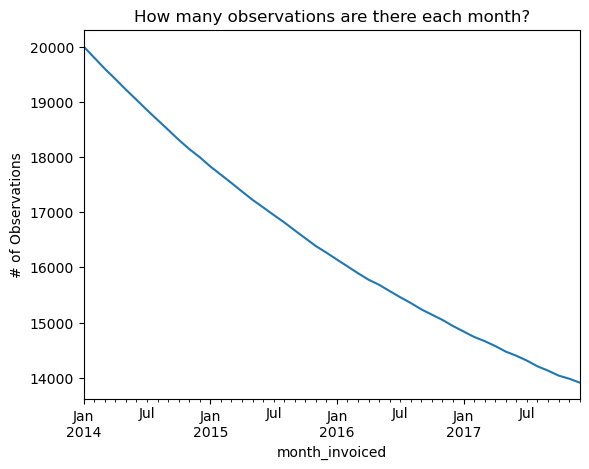

In [42]:
df.resample('M').size().plot()
plt.ylabel('# of Observations')
plt.title('How many observations are there each month?')

[Text(0.5, 1.0, 'Revenue Over time'),
 Text(0, 0.5, 'Revenue'),
 Text(0.5, 0, '')]

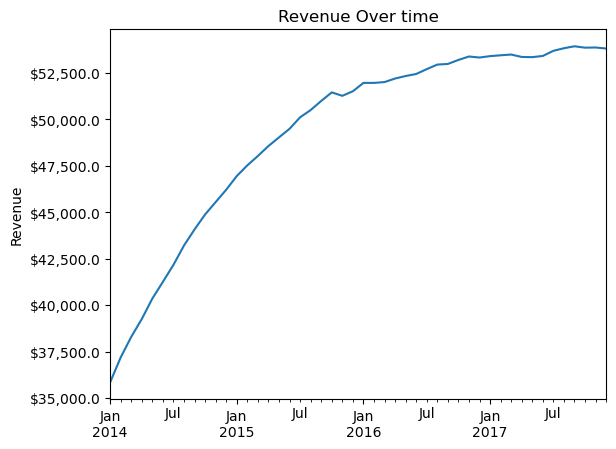

In [44]:
ax = df.resample('M').amount.sum().plot()
ax.yaxis.set_major_formatter(StrMethodFormatter('${x:,}'))
ax.set(title='Revenue Over time', ylabel='Revenue', xlabel='')


In [47]:
df = df.resample('M')[['amount']].sum()